In [1]:
#Use to import the file into google Colab drive
from google.colab import files

#Use to import io, which opens the file from the Colab drive
import io

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()

Saving CarbonEmissionData2.csv to CarbonEmissionData2.csv


In [3]:
# Now use the below code to read the csv in pandas' dataframe
df = pd.read_csv(io.StringIO(uploaded[list(uploaded.keys())[0]].decode('utf-8')))

print(df.shape)
# df = df.drop(12) # loc[:32]
df

(32, 8)


,Category,Brand,Model Name/No.,Screen Size (Inch),Assembly Location,weight (kg),Price (MRP),Carbon emission (kg)
0,Laptop,Dell,XPS 13 9360,13.3,China,1.230,110000.0,286.00
1,Laptop,Dell,XPS 15 9570,15.6,China,2.050,153603.0,324.00
2,Laptop,Dell,XPS 7390,13.3,China,1.290,120957.0,372.00
3,Laptop,Dell,XPS 9310,13.4,China,1.200,189990.0,322.00
4,Laptop,Dell,XPS 9370,13.3,China,1.210,110529.0,297.00
5,Laptop,Dell,XPS 9500,15.6,China,1.830,289000.0,380.00
6,Laptop,Dell,XPS 9310,13.4,China,1.200,189990.0,342.00
7,Laptop,Dell,XPS 9300,13.3,China,1.270,154446.0,327.00
8,Laptop,HP,Notebook PC 240 G7,14.0,China,1.520,77800.0,265.00
9,Laptop,HP,Notebook PC 245 G7,14.0,China,1.500,28000.0,275.00


In [4]:
# -------------

# # find unique Categories
# categories = df['Category'].unique()

# # assign each category a int value, to train the model
# categories_map = {}
# for i,x in enumerate(categories): categories_map[x]=i

# # map each category with int value
# df['Category'] = df['Category'].map(categories_map)

# -------------

def map_string_to_int(_series):
  str_val = _series.unique()

  str_val_map = {}
  for i,x in enumerate(str_val): str_val_map[x]=i

  return _series.map(str_val_map)

df['Category'] = map_string_to_int(df['Category'])
df['Brand'] = map_string_to_int(df['Brand'])
df['Model Name/No.'] = map_string_to_int(df['Model Name/No.'])
df['Assembly Location'] = map_string_to_int(df['Assembly Location'])

df.head()

,Category,Brand,Model Name/No.,Screen Size (Inch),Assembly Location,weight (kg),Price (MRP),Carbon emission (kg)
0,0,0,0,13.3,0,1.23,110000.0,286.0
1,0,0,1,15.6,0,2.05,153603.0,324.0
2,0,0,2,13.3,0,1.29,120957.0,372.0
3,0,0,3,13.4,0,1.20,189990.0,322.0
4,0,0,4,13.3,0,1.21,110529.0,297.0


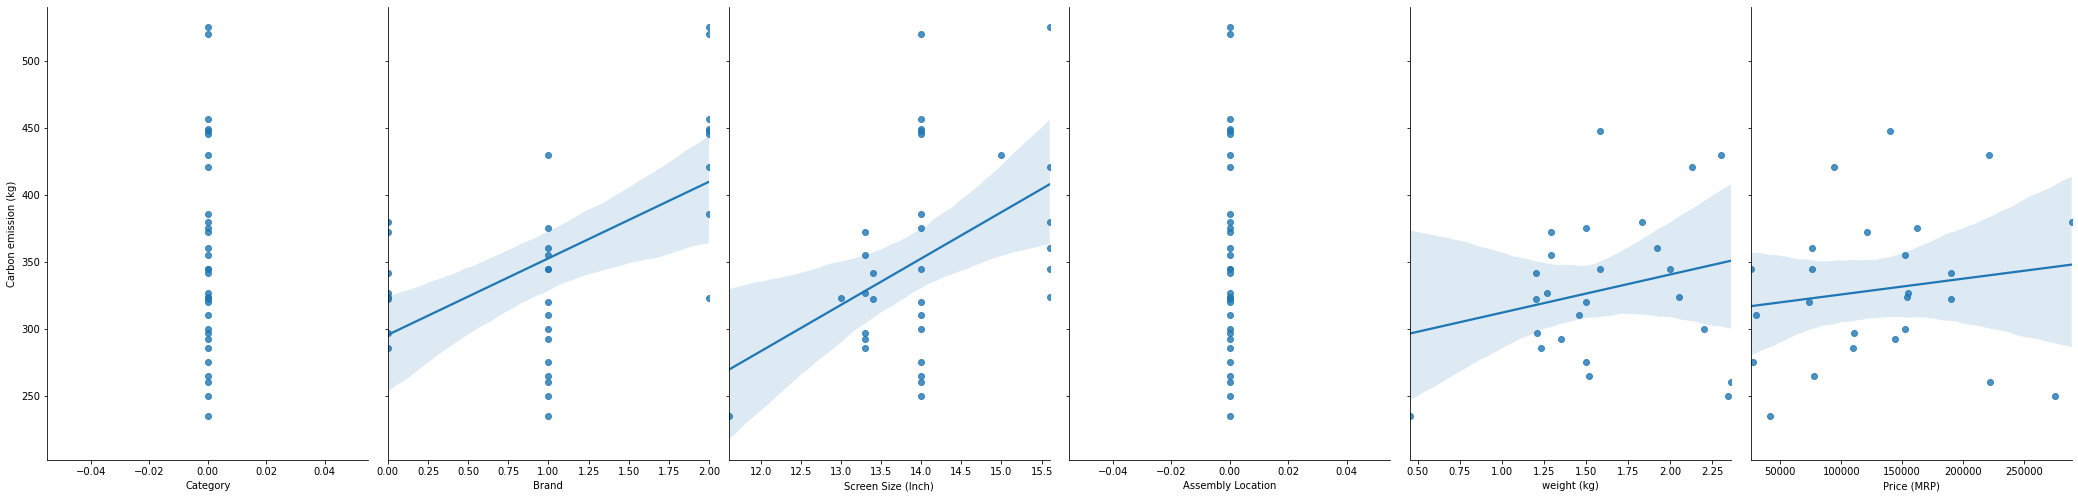

In [5]:
sns.pairplot(df, x_vars=['Category','Brand','Screen Size (Inch)','Assembly Location','weight (kg)','Price (MRP)'], y_vars='Carbon emission (kg)', height=7, aspect=0.7, kind='reg', dropna=True)

In [6]:
X = df.drop('Carbon emission (kg)', axis=1)
y = df['Carbon emission (kg)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

values = {'weight (kg)': X_train['weight (kg)'].mean(), 'Price (MRP)': X_train['Price (MRP)'].mean()}
X_train = X_train.loc[:].fillna(value=values)   # X_train.loc[:] => to make local copy, to avoid SettingWithCopyWarning

values = {'weight (kg)': X_test['weight (kg)'].mean(), 'Price (MRP)': X_test['Price (MRP)'].mean()}
X_test = X_test.loc[:].fillna(value=values)

X_train.shape, X_test.shape

((21, 7), (11, 7))

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

predicted = model.predict(X_test)

pd.DataFrame(data={'Actual': np.array(y_test), 'Pred': predicted})

model.score(X_test, y_test)

0.7188021365717976

In [8]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.9)

model2.fit(X_train,y_train)

predicted2 = model2.predict(X_test)

pd.DataFrame(data={'Actual': np.array(y_test), 'Pred': predicted2})

model2.score(X_test, y_test)

0.7170518933743026

In [9]:
from sklearn.linear_model import BayesianRidge

model3 = BayesianRidge()

model3.fit(X_train,y_train)

predicted3 = model3.predict(X_test)

pd.DataFrame(data={'Actual': np.array(y_test), 'Pred': predicted3})

model3.score(X_test, y_test)

-0.03184983859075463